In [1]:
# Import packages to visualize the classifer
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

# Import packages to do the classifying
import numpy as np
from sklearn.svm import SVC
from scipy.stats import norm
from sklearn.metrics import accuracy_score, classification_report

In [2]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('grey', 'lightblue', 'lightgreen', 'gray', 'darkblue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

## generate data

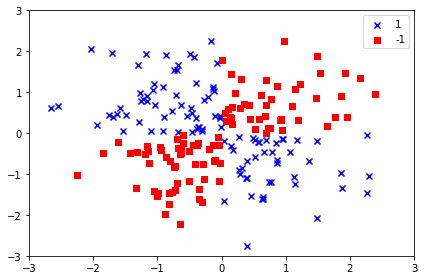

In [3]:
np.random.seed(0)
sigma=1
mu=0
X_xor = sigma*np.random.randn(200, 2) +mu
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [4]:
np.random.seed(1)
n = 100 

r1 = np.sqrt(np.random.rand(2*n,1))

t_1 = [np.pi/2*np.random.rand(n,1), (np.pi/2*np.random.rand(n,1)+np.pi)]#; % Random angles for Q1 and Q3
t1=np.reshape(t_1, (1,200))
X1 = [np.multiply(r1,np.cos(t1)), np.multiply(r1,np.sin(t1))]# Polar-to-Cartesian conversion

r2 =np.sqrt(np.random.rand(2*n,1))
t_2 = [np.pi/2*np.random.rand(n,1)+(0.5*np.pi), ((0.5*np.pi)*np.random.rand(n,1)-(0.5*np.pi))] #% Random angles for Q2 and Q4
t2=np.reshape(t_2, (1,200))
X2 = [np.multiply(r2,np.cos(t2)), np.multiply(r2,np.sin(t2))]# Polar-to-Cartesian conversion

X = np.vstack((X1,X2))
Y = np.ones(4*n)
Y[2*n+1:]=-1 #labels


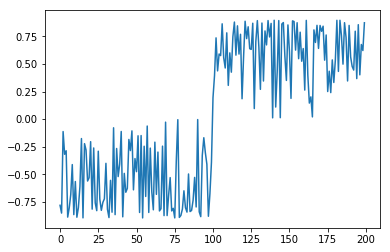

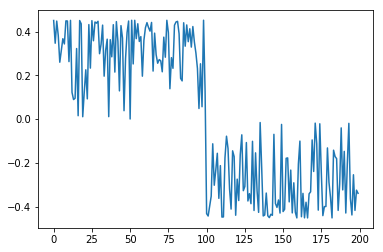

/home/ak/Envs/research/local/lib/python2.7/site-packages/matplotlib/collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


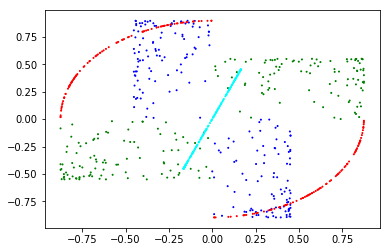

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
# plt.scatter(X[:,11][1], X[:,1][1],Y)
plt.plot(X[2,:][1])
colors = np.random.rand(n)
plt.show()
plt.plot((X[1,:][12]))
plt.show()
plt.scatter((X[1,:][12]),X[2,:][1],Y, c='blue')
plt.scatter((X[2,:][14]),X[3,:][1],Y, c='red')
plt.scatter((X[3,:][14]),X[1,:][3],Y, c='green')
plt.scatter((X[0,:][14]),X[0,:][12],Y, c='cyan')


In [6]:
def my_kernel(X, Y):
    return np.dot(X, Y.T)


In [7]:
my_kernel(X,Y)

ValueError: shapes (4,200,200) and (400,) not aligned: 200 (dim 2) != 400 (dim 0)

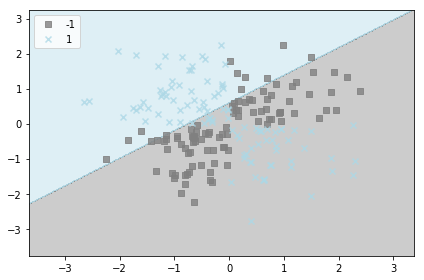

In [8]:
# Create a SVC classifier using a linear kernel
svm = SVC(kernel='linear', C=1, random_state=0)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [9]:
y_pred= svm.predict(X_xor)
print(classification_report(y_xor, y_pred))

             precision    recall  f1-score   support

         -1       0.62      0.88      0.73        99
          1       0.80      0.47      0.59       101

avg / total       0.71      0.67      0.66       200



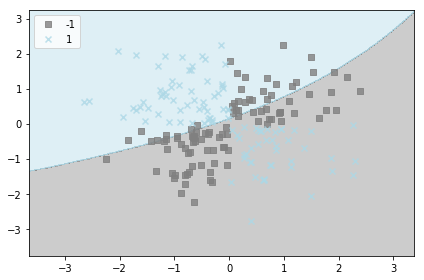

In [10]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [11]:
y_pred= svm.predict(X_xor)
print(classification_report(y_xor, y_pred))

             precision    recall  f1-score   support

         -1       0.61      0.69      0.65        99
          1       0.65      0.57      0.61       101

avg / total       0.63      0.63      0.63       200



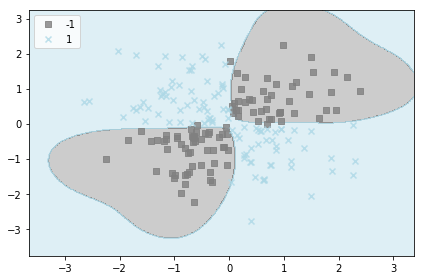

In [12]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=1, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

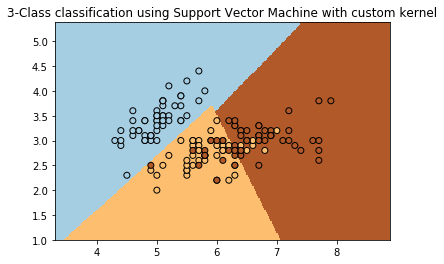

In [13]:
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
Y = iris.target


def my_kernel(X, Y):
    """
    We create a custom kernel:

                 (2  0)
    k(X, Y) = X  (    ) Y.T
                 (0  1)
    """
    M = np.array([[2, 0], [0, 1.0]])
    return np.dot(np.dot(X, M), Y.T)


h = .02  # step size in the mesh

# we create an instance of SVM and fit out data.
clf = svm.SVC(kernel=my_kernel)
clf.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('3-Class classification using Support Vector Machine with custom'
          ' kernel')
plt.axis('tight')
plt.show()

In [14]:
import numpy as np
import pandas as pd
import os

import MKLpy
from MKLpy.regularization import rescale_01, normalization
from sklearn.datasets import load_svmlight_file, dump_svmlight_file
from hsmm_core.consts import LabellingChoice, ThresholdMethod
from hsmm_core.labelling import DataLabellingSimple
#from MKLpy.algorithms import EasyMKL, RMGD,RMKL,AverageMKL, KOMD


ImportError: No module named regularization

In [19]:
import cvxopt

In [20]:
from MKLpy.algorithms import EasyMKL, AverageMKL, KOMD

In [21]:

from MKLpy.metrics.pairwise import HPK_kernel

from sklearn.metrics.pairwise import rbf_kernel as RBF
from sklearn.svm import SVC

no_syn_points = 200
columns = ['feature{}'.format(ii) for ii in range(1, 5)]

df = pd.DataFrame({col: np.random.randn(no_syn_points) for col in columns})

path = os.path.join(os.path.expanduser('~'), 'temp/mkl_example.dmp')

df['labels'] = np.random.choice([0, 1], size=len(df))
dump_svmlight_file(df[columns].values, df['labels'].values, path)

X, Y = load_svmlight_file(path)

X = X.toarray()	#Important! MKLpy require dense matrices!
X = rescale_01(X)
X = normalization(X)

KL = [HPK_kernel(X, degree=d) for d in range(1,11)]

# learn kernel
K_easy1 = EasyMKL(lam=0.1).arrange_kernel(KL, Y)
# K_rmgd = RMGD(max_iter=3).arrange_kernel(KL, Y)

clf_easy1 = EasyMKL(lam=0.1).fit(KL, Y)

ImportError: cannot import name HPK_kernel

In [26]:
#load data
print 'loading \'breast cancer\' dataset...'
from sklearn.datasets import load_breast_cancer
ds = load_breast_cancer()
X,Y = ds.data, ds.target
print 'done'

'''
WARNING: be sure that your matrix is not sparse! EXAMPLE:
from sklearn.datasets import load_svmlight_file
X,Y = load_svmlight_file(...)
X = X.toarray()
'''

#preprocess data
print 'preprocessing data...'
from MKLpy.preprocessing import normalization, rescale_01
X = rescale_01(X)	#feature scaling in [0,1]
X = normalization(X) #||X_i||_2^2 = 1

#train/test split
from sklearn.model_selection import train_test_split
Xtr,Xte,Ytr,Yte = train_test_split(X,Y, test_size=.25, random_state=42)
print 'done'


#compute homogeneous polynomial kernels with degrees 0,1,2,...,10.
print 'computing Homogeneous Polynomial Kernels...'
from MKLpy.metrics import pairwise
KLtr = [pairwise.homogeneous_polynomial_kernel(Xtr, degree=d) for d in range(11)]
KLte = [pairwise.homogeneous_polynomial_kernel(Xte,Xtr, degree=d) for d in range(11)]
print ('done')

loading 'breast cancer' dataset...
done
preprocessing data...
done
computing Homogeneous Polynomial Kernels...
done


In [27]:
#MKL algorithms
from MKLpy.algorithms import AverageMKL, EasyMKL, KOMD	#KOMD is not a MKL algorithm but a simple kernel machine like the SVM
print 'training AverageMKL...'
clf = AverageMKL().fit(KLtr,Ytr)	#a wrapper for averaging kernels
print 'done'
print(clf.weights)			#print the weights of the combination of base kernels
K_average = clf.ker_matrix	#the combined kernel matrix



# #evaluate the solution
# from sklearn.metrics import accuracy_score, roc_auc_score
# y_pred = clf.predict(KLte)					#predictions
# y_score = clf.decision_function(KLte)		#rank
# accuracy = accuracy_score(Yte, y_pred)
# roc_auc = roc_auc_score(Yte, y_score)
# print ('Accuracy score: %.3f, roc AUC score: %.3f' % (accuracy, roc_auc))


# #select the base-learner
# #MKL algorithms use a hard-margin as base learned (or KOMD in the case of EasyMKL). It is possible to define a different base learner
# from sklearn.svm import SVC
# base_learner = SVC(C=0.1)
# clf = EasyMKL(estimator=base_learner)
# clf = clf.fit(KLtr,Ytr)

training AverageMKL...
done
[0.09090909 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909
 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909]


In [29]:
print 'training EasyMKL...'
clf = EasyMKL(lam=0.1).fit(KLtr,Ytr)		#combining kernels with the EasyMKL algorithm
#lam is a hyper-parameter in [0,1]
print 'done'
print clf.weights


training EasyMKL...
done
[-2.34839284e-24  1.35673700e-02  2.76971359e-02  4.30853034e-02
  6.02816730e-02  7.96701534e-02  1.01481855e-01  1.25820437e-01
  1.52689783e-01  1.82019528e-01  2.13686761e-01]


In [30]:

#evaluate the solution
from sklearn.metrics import accuracy_score, roc_auc_score
y_pred = clf.predict(KLte)					#predictions
y_score = clf.decision_function(KLte)		#rank
accuracy = accuracy_score(Yte, y_pred)
roc_auc = roc_auc_score(Yte, y_score)
print('Accuracy score: %.3f, roc AUC score: %.3f' % (accuracy, roc_auc))

Accuracy score: 0.923, roc AUC score: 0.988
